# Week 7 - Lab 7-02

This lab will be used to go over regression plots. 


In [39]:
# import modules 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import re 
from datetime import datetime
import pytz

## Section 1 - Viewing the Seaborn Tips dataset

In [40]:
# path = 'https://github.com/mwaskom/seaborn-data/blob/master/tips.csv'
# dataset = pd.read_csv(path)
# print(dataset.head())

In [41]:
# load the dataset 
dataset = sns.load_dataset("tips", cache=False)
print(dataset.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


## Section 2 - Regression Plot Tips dataset (tips against the total bill)

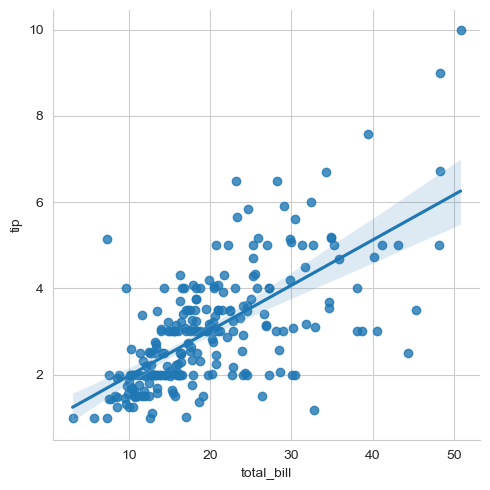

In [42]:
sns.set_style('whitegrid') 
sns.lmplot(x='total_bill', y='tip', order=1, data=dataset);

## Section 3 - Regression Plot Tips dataset (tips against size)

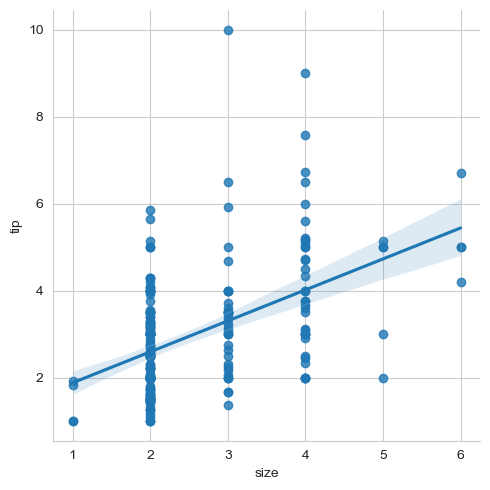

In [43]:
sns.lmplot(x="size", y="tip", data=dataset);

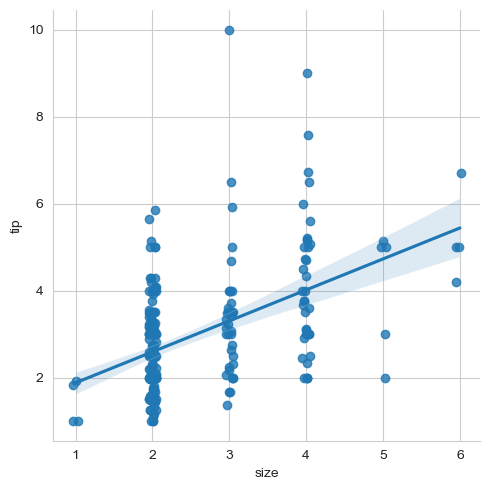

In [44]:
# adding jitter to make it easier to see, which is needed for size 2 and 3
sns.lmplot(x="size", y="tip", data=dataset, x_jitter=0.05);

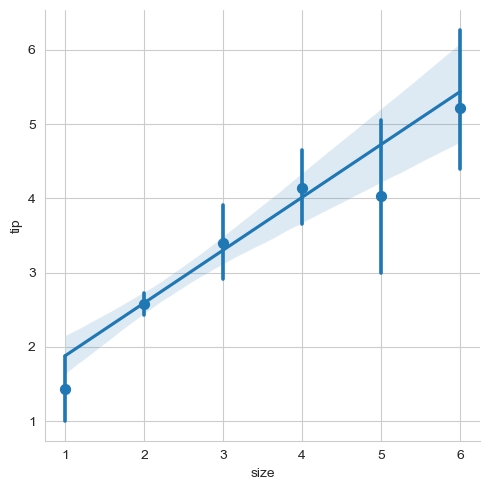

In [45]:
# lmplot of the mean of tip per size 
sns.lmplot(x="size", y="tip", data=dataset, x_estimator=np.mean);

## Section 4 - Regression of Log files

This example will use the access log data that was done as part of Week 4. The log file will be read in directory from the directory. 

In [46]:
def parse_str(x):
    """
    Returns the string delimited by two characters such as [].

    Parameters 
        x (str): input string that is delimited 
    """
    return x[1:-1]


def parse_datetime(x):
    '''
    Parses datetime with timezone formatted as:
        `[day/month/year:hour:minute:second zone]`

    Example:
        `>>> parse_datetime('13/Nov/2015:11:45:42 +0000')`
        `datetime.datetime(2015, 11, 3, 11, 45, 4, tzinfo=<UTC>)`
        
    '''
    dt = datetime.strptime(x[1:-1], '%d/%b/%Y:%H:%M:%S')
    return dt


In [47]:
df = pd.read_csv(
    'access.log',
    sep=r'\s(?=(?:[^"]*"[^"]*")*[^"]*$)(?![^\[]*\])',
    engine='python',
    na_values='-',
    header=None,
    usecols=[0, 3, 4, 5, 6, 7, 8],
    names=['ip', 'time', 'request', 'status', 'size', 'referer', 'user_agent'],
    converters={'time': parse_datetime,
                'request': parse_str,
                'status': int,
                'size': int,
                'referer': parse_str,
                'user_agent': parse_str})

request = df.pop('request').str.split()
df['resource'] = request.str[1]
df['method'] = request.str[0]
df['url'] = request.str[1].str.split('?').str[0] 


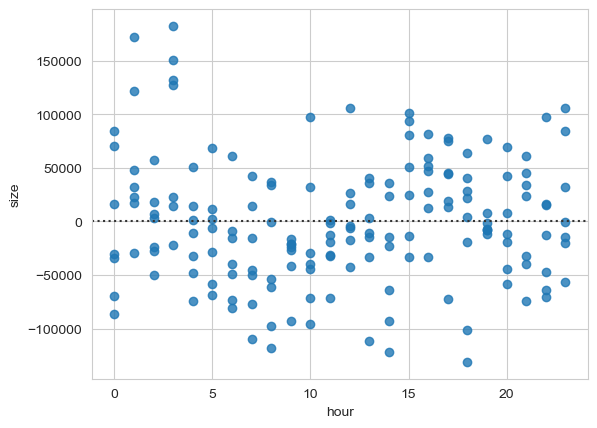

In [48]:
# resampling ecvery hour and getting a sum
dfbyhour =df.resample('h',on='time').sum()

dfbyhour['hour'] = dfbyhour.index.hour
dfbyhour['date'] = dfbyhour.index.date

# resisual plot with 1st order polynomial 
sns.residplot(x="hour", y="size", data=dfbyhour, order=1); 